# LSTM을 이용한 직접 만든 cos 주가 예측 

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from evaluate_ts import evaluate_ts
from tools import fetch_cosine_values, format_dataset

In [19]:
# from tensorflow.python.compiler.mlcompute import mlcompute
# mlcompute.set_mlc_device(device_name='cpu') # Available options are 'cpu', 'gpu', and ‘any'.

In [20]:
time_dims = 20
train_size = 250
test_size = 250

In [21]:
learning_rate = 0.01
optimizer = tf.keras.optimizers.Adam
n_epochs = 100
n_embeddings = 64

In [22]:
if True:
    learning_rate = 0.5
    n_epochs = 10000
    n_embeddings = time_dims

In [23]:
cos_values = fetch_cosine_values(train_size+test_size+time_dims)
minibatch_cos_x, minibatch_cos_y = format_dataset(cos_values, time_dims)

In [24]:
train_X = minibatch_cos_x[:train_size, :].astype(np.float32)
train_y = minibatch_cos_y[:train_size].reshape((-1, 1)).astype(np.float32)
test_X = minibatch_cos_x[train_size:, :].astype(np.float32)
test_y = minibatch_cos_y[train_size:].reshape((-1, 1)).astype(np.float32)

In [25]:
train_x_ts = train_X[:,:,np.newaxis] #np.newaxis : 차원 하나 추가
test_x_ts = test_X[:,:,np.newaxis]

###  np.newaxis 하는 이유
RNN은 입력으로 3차원 신호가 필요하기 때문
(샘플 수, 시간 단계 수, 특징 수)
우리는 1차원 신호만 처리하기 떄문에 마지막 차원은 1로 고정 (None, time_dims, 1)

In [26]:
print(train_X.shape)
print(train_x_ts.shape)

(250, 20)
(250, 20, 1)


In [27]:
model = keras.Sequential()
# model.add(layers.Embedding(input_dim = 250, output_dim = n_embeddings))
model.add(layers.LSTM(units = 10, input_shape=(time_dims,1)))
model.add(layers.Dense(units = 1,activation='linear'))
model.compile(loss='mse',optimizer=optimizer(learning_rate),
             metrics=['mse','mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(train_x_ts,train_y,epochs = n_epochs)

Epoch 1/10000
8/8 [==============================] - 0s 2ms/step - loss: 1.4653 - mse: 1.4653 - mae: 1.0096
Epoch 2/10000
8/8 [==============================] - 0s 2ms/step - loss: 0.2699 - mse: 0.2699 - mae: 0.4609
Epoch 3/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0361 - mse: 0.0361 - mae: 0.1602
Epoch 4/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0250 - mse: 0.0250 - mae: 0.1304
Epoch 5/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0102 - mse: 0.0102 - mae: 0.0828
Epoch 6/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0058 - mse: 0.0058 - mae: 0.0650
Epoch 7/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0366
Epoch 8/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0302
Epoch 9/10000
8/8 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0269
Epoch 10/10000
8/8 [========

8/8 [==============================] - 0s 2ms/step - loss: 2.0698e-05 - mse: 2.0698e-05 - mae: 0.0031
Epoch 72/10000
8/8 [==============================] - 0s 1ms/step - loss: 2.8554e-05 - mse: 2.8554e-05 - mae: 0.0039
Epoch 73/10000
8/8 [==============================] - 0s 1ms/step - loss: 2.5640e-05 - mse: 2.5640e-05 - mae: 0.0036
Epoch 74/10000
8/8 [==============================] - 0s 1ms/step - loss: 2.1860e-05 - mse: 2.1860e-05 - mae: 0.0034
Epoch 75/10000
8/8 [==============================] - 0s 1ms/step - loss: 2.0801e-05 - mse: 2.0801e-05 - mae: 0.0035
Epoch 76/10000
8/8 [==============================] - 0s 1ms/step - loss: 1.9861e-05 - mse: 1.9861e-05 - mae: 0.0033
Epoch 77/10000
8/8 [==============================] - 0s 1ms/step - loss: 2.4410e-05 - mse: 2.4410e-05 - mae: 0.0036
Epoch 78/10000
8/8 [==============================] - 0s 1ms/step - loss: 1.9380e-05 - mse: 1.9380e-05 - mae: 0.0032
Epoch 79/10000
8/8 [==============================] - 0s 1ms/step - loss: 3.065

8/8 [==============================] - 0s 1ms/step - loss: 1.9387e-05 - mse: 1.9387e-05 - mae: 0.0033
Epoch 141/10000
8/8 [==============================] - 0s 1ms/step - loss: 3.4029e-05 - mse: 3.4029e-05 - mae: 0.0048
Epoch 142/10000
8/8 [==============================] - 0s 1ms/step - loss: 1.9462e-05 - mse: 1.9462e-05 - mae: 0.0034
Epoch 143/10000
8/8 [==============================] - 0s 1ms/step - loss: 2.1569e-05 - mse: 2.1569e-05 - mae: 0.0036
Epoch 144/10000
8/8 [==============================] - 0s 1ms/step - loss: 2.7212e-05 - mse: 2.7212e-05 - mae: 0.0042
Epoch 145/10000
8/8 [==============================] - 0s 1ms/step - loss: 5.0517e-05 - mse: 5.0517e-05 - mae: 0.0057
Epoch 146/10000
8/8 [==============================] - 0s 1ms/step - loss: 6.8887e-05 - mse: 6.8887e-05 - mae: 0.0070
Epoch 147/10000
8/8 [==============================] - 0s 1ms/step - loss: 6.0231e-05 - mse: 6.0231e-05 - mae: 0.0061
Epoch 148/10000
8/8 [==============================] - 0s 1ms/step - los

8/8 [==============================] - 0s 1ms/step - loss: 1.5561e-04 - mse: 1.5561e-04 - mae: 0.0107
Epoch 210/10000
8/8 [==============================] - 0s 1ms/step - loss: 1.3901e-04 - mse: 1.3901e-04 - mae: 0.0097
Epoch 211/10000
8/8 [==============================] - 0s 1ms/step - loss: 2.2148e-04 - mse: 2.2148e-04 - mae: 0.0128
Epoch 212/10000
8/8 [==============================] - 0s 1ms/step - loss: 2.5226e-04 - mse: 2.5226e-04 - mae: 0.0133
Epoch 213/10000
8/8 [==============================] - 0s 1ms/step - loss: 8.4712e-05 - mse: 8.4712e-05 - mae: 0.0077
Epoch 214/10000
8/8 [==============================] - 0s 1ms/step - loss: 3.1579e-05 - mse: 3.1579e-05 - mae: 0.0044
Epoch 215/10000
8/8 [==============================] - 0s 1ms/step - loss: 3.0360e-05 - mse: 3.0360e-05 - mae: 0.0044
Epoch 216/10000
8/8 [==============================] - 0s 1ms/step - loss: 6.3907e-05 - mse: 6.3907e-05 - mae: 0.0062
Epoch 217/10000
8/8 [==============================] - 0s 1ms/step - los

8/8 [==============================] - 0s 1ms/step - loss: 1.2994e-05 - mse: 1.2994e-05 - mae: 0.0029
Epoch 279/10000
8/8 [==============================] - 0s 1ms/step - loss: 2.3912e-05 - mse: 2.3912e-05 - mae: 0.0041
Epoch 280/10000
8/8 [==============================] - 0s 1ms/step - loss: 4.4188e-05 - mse: 4.4188e-05 - mae: 0.0055
Epoch 281/10000
8/8 [==============================] - 0s 1ms/step - loss: 5.0140e-05 - mse: 5.0140e-05 - mae: 0.0058
Epoch 282/10000
8/8 [==============================] - 0s 1ms/step - loss: 1.5179e-05 - mse: 1.5179e-05 - mae: 0.0030
Epoch 283/10000
8/8 [==============================] - 0s 1ms/step - loss: 2.5989e-05 - mse: 2.5989e-05 - mae: 0.0044
Epoch 284/10000
8/8 [==============================] - 0s 1ms/step - loss: 2.0079e-05 - mse: 2.0079e-05 - mae: 0.0037
Epoch 285/10000
8/8 [==============================] - 0s 1ms/step - loss: 6.0370e-05 - mse: 6.0370e-05 - mae: 0.0066
Epoch 286/10000
8/8 [==============================] - 0s 1ms/step - los

8/8 [==============================] - 0s 1ms/step - loss: 1.6718e-04 - mse: 1.6718e-04 - mae: 0.0103
Epoch 349/10000
8/8 [==============================] - 0s 1ms/step - loss: 2.7283e-04 - mse: 2.7283e-04 - mae: 0.0139
Epoch 350/10000
8/8 [==============================] - 0s 1ms/step - loss: 6.2388e-05 - mse: 6.2388e-05 - mae: 0.0066
Epoch 351/10000
8/8 [==============================] - 0s 1ms/step - loss: 2.4715e-04 - mse: 2.4715e-04 - mae: 0.0132
Epoch 352/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0010 - mse: 0.0010 - mae: 0.0257
Epoch 353/10000
8/8 [==============================] - 0s 1ms/step - loss: 4.2342e-04 - mse: 4.2342e-04 - mae: 0.0160
Epoch 354/10000
8/8 [==============================] - 0s 1ms/step - loss: 3.6670e-04 - mse: 3.6670e-04 - mae: 0.0158
Epoch 355/10000
8/8 [==============================] - 0s 1ms/step - loss: 2.8307e-04 - mse: 2.8307e-04 - mae: 0.0131
Epoch 356/10000
8/8 [==============================] - 0s 1ms/step - loss: 2.088

8/8 [==============================] - 0s 1ms/step - loss: 1.8277e-04 - mse: 1.8277e-04 - mae: 0.0104
Epoch 419/10000
8/8 [==============================] - 0s 1ms/step - loss: 3.7875e-04 - mse: 3.7875e-04 - mae: 0.0175
Epoch 420/10000
8/8 [==============================] - 0s 1ms/step - loss: 1.2390e-04 - mse: 1.2390e-04 - mae: 0.0098
Epoch 421/10000
8/8 [==============================] - 0s 1ms/step - loss: 3.9803e-05 - mse: 3.9803e-05 - mae: 0.0049
Epoch 422/10000
8/8 [==============================] - 0s 1ms/step - loss: 3.8894e-05 - mse: 3.8894e-05 - mae: 0.0055
Epoch 423/10000
8/8 [==============================] - 0s 1ms/step - loss: 3.2956e-05 - mse: 3.2956e-05 - mae: 0.0047
Epoch 424/10000
8/8 [==============================] - 0s 1ms/step - loss: 3.4580e-05 - mse: 3.4580e-05 - mae: 0.0049
Epoch 425/10000
8/8 [==============================] - 0s 1ms/step - loss: 3.9256e-05 - mse: 3.9256e-05 - mae: 0.0054
Epoch 426/10000
8/8 [==============================] - 0s 1ms/step - los

8/8 [==============================] - 0s 1ms/step - loss: 5.3785e-04 - mse: 5.3785e-04 - mae: 0.0176
Epoch 490/10000
8/8 [==============================] - 0s 1ms/step - loss: 4.9190e-04 - mse: 4.9190e-04 - mae: 0.0169
Epoch 491/10000
8/8 [==============================] - 0s 1ms/step - loss: 5.8174e-04 - mse: 5.8174e-04 - mae: 0.0186
Epoch 492/10000
8/8 [==============================] - 0s 2ms/step - loss: 8.5507e-04 - mse: 8.5507e-04 - mae: 0.0224
Epoch 493/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0010 - mse: 0.0010 - mae: 0.0258    
Epoch 494/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0267    
Epoch 495/10000
8/8 [==============================] - 0s 1ms/step - loss: 4.4354e-04 - mse: 4.4354e-04 - mae: 0.0159
Epoch 496/10000
8/8 [==============================] - 0s 1ms/step - loss: 9.0325e-04 - mse: 9.0325e-04 - mae: 0.0238
Epoch 497/10000
8/8 [==============================] - 0s 1ms/step - loss: 4.490

8/8 [==============================] - 0s 1ms/step - loss: 3.3083e-04 - mse: 3.3083e-04 - mae: 0.0142
Epoch 559/10000
8/8 [==============================] - 0s 1ms/step - loss: 5.4609e-04 - mse: 5.4609e-04 - mae: 0.0182
Epoch 560/10000
8/8 [==============================] - 0s 1ms/step - loss: 1.1802e-04 - mse: 1.1802e-04 - mae: 0.0082
Epoch 561/10000
8/8 [==============================] - 0s 1ms/step - loss: 1.8780e-04 - mse: 1.8780e-04 - mae: 0.0103
Epoch 562/10000
8/8 [==============================] - 0s 1ms/step - loss: 5.8487e-04 - mse: 5.8487e-04 - mae: 0.0199
Epoch 563/10000
8/8 [==============================] - 0s 1ms/step - loss: 2.8634e-04 - mse: 2.8634e-04 - mae: 0.0121
Epoch 564/10000
8/8 [==============================] - 0s 1ms/step - loss: 1.1056e-04 - mse: 1.1056e-04 - mae: 0.0086
Epoch 565/10000
8/8 [==============================] - 0s 1ms/step - loss: 1.2401e-04 - mse: 1.2401e-04 - mae: 0.0087
Epoch 566/10000
8/8 [==============================] - 0s 1ms/step - los

8/8 [==============================] - 0s 1ms/step - loss: 2.5801e-04 - mse: 2.5801e-04 - mae: 0.0120
Epoch 630/10000
8/8 [==============================] - 0s 1ms/step - loss: 5.7728e-04 - mse: 5.7728e-04 - mae: 0.0190
Epoch 631/10000
8/8 [==============================] - 0s 1ms/step - loss: 3.1455e-04 - mse: 3.1455e-04 - mae: 0.0143
Epoch 632/10000
8/8 [==============================] - 0s 1ms/step - loss: 2.9299e-04 - mse: 2.9299e-04 - mae: 0.0133
Epoch 633/10000
8/8 [==============================] - 0s 1ms/step - loss: 4.2423e-04 - mse: 4.2423e-04 - mae: 0.0158
Epoch 634/10000
8/8 [==============================] - 0s 1ms/step - loss: 6.4389e-04 - mse: 6.4389e-04 - mae: 0.0213
Epoch 635/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0275
Epoch 636/10000
8/8 [==============================] - 0s 1ms/step - loss: 9.1434e-04 - mse: 9.1434e-04 - mae: 0.0236
Epoch 637/10000
8/8 [==============================] - 0s 1ms/step - loss: 9.598

8/8 [==============================] - 0s 1ms/step - loss: 2.1107e-04 - mse: 2.1107e-04 - mae: 0.0112
Epoch 699/10000
8/8 [==============================] - 0s 1ms/step - loss: 1.2952e-04 - mse: 1.2952e-04 - mae: 0.0094
Epoch 700/10000
8/8 [==============================] - 0s 1ms/step - loss: 3.4030e-04 - mse: 3.4030e-04 - mae: 0.0152
Epoch 701/10000
8/8 [==============================] - 0s 1ms/step - loss: 2.5355e-04 - mse: 2.5355e-04 - mae: 0.0132
Epoch 702/10000
8/8 [==============================] - 0s 1ms/step - loss: 2.7973e-04 - mse: 2.7973e-04 - mae: 0.0129
Epoch 703/10000
8/8 [==============================] - 0s 1ms/step - loss: 3.5405e-04 - mse: 3.5405e-04 - mae: 0.0158
Epoch 704/10000
8/8 [==============================] - 0s 1ms/step - loss: 7.6575e-04 - mse: 7.6575e-04 - mae: 0.0218
Epoch 705/10000
8/8 [==============================] - 0s 1ms/step - loss: 4.7636e-04 - mse: 4.7636e-04 - mae: 0.0180
Epoch 706/10000
8/8 [==============================] - 0s 1ms/step - los

8/8 [==============================] - 0s 1ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0360
Epoch 771/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0326
Epoch 772/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0282    
Epoch 773/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0350
Epoch 774/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0275    
Epoch 775/10000
8/8 [==============================] - 0s 1ms/step - loss: 3.6368e-04 - mse: 3.6368e-04 - mae: 0.0155
Epoch 776/10000
8/8 [==============================] - 0s 1ms/step - loss: 2.6704e-04 - mse: 2.6704e-04 - mae: 0.0134
Epoch 777/10000
8/8 [==============================] - 0s 1ms/step - loss: 3.2222e-04 - mse: 3.2222e-04 - mae: 0.0150
Epoch 778/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0

8/8 [==============================] - 0s 1ms/step - loss: 2.0902e-04 - mse: 2.0902e-04 - mae: 0.0118
Epoch 841/10000
8/8 [==============================] - 0s 1ms/step - loss: 2.0693e-04 - mse: 2.0693e-04 - mae: 0.0118
Epoch 842/10000
8/8 [==============================] - 0s 1ms/step - loss: 1.5178e-04 - mse: 1.5178e-04 - mae: 0.0101
Epoch 843/10000
8/8 [==============================] - 0s 1ms/step - loss: 1.2836e-04 - mse: 1.2836e-04 - mae: 0.0097
Epoch 844/10000
8/8 [==============================] - 0s 1ms/step - loss: 1.3517e-04 - mse: 1.3517e-04 - mae: 0.0096
Epoch 845/10000
8/8 [==============================] - 0s 1ms/step - loss: 1.9935e-04 - mse: 1.9935e-04 - mae: 0.0118
Epoch 846/10000
8/8 [==============================] - 0s 1ms/step - loss: 1.8789e-04 - mse: 1.8789e-04 - mae: 0.0108
Epoch 847/10000
8/8 [==============================] - 0s 1ms/step - loss: 7.6121e-05 - mse: 7.6121e-05 - mae: 0.0071
Epoch 848/10000
8/8 [==============================] - 0s 1ms/step - los

8/8 [==============================] - 0s 1ms/step - loss: 6.3194e-04 - mse: 6.3194e-04 - mae: 0.0204
Epoch 911/10000
8/8 [==============================] - 0s 1ms/step - loss: 5.2414e-04 - mse: 5.2414e-04 - mae: 0.0186
Epoch 912/10000
8/8 [==============================] - 0s 1ms/step - loss: 4.4024e-04 - mse: 4.4024e-04 - mae: 0.0170
Epoch 913/10000
8/8 [==============================] - 0s 1ms/step - loss: 5.1764e-04 - mse: 5.1764e-04 - mae: 0.0192
Epoch 914/10000
8/8 [==============================] - 0s 1ms/step - loss: 4.4527e-04 - mse: 4.4527e-04 - mae: 0.0165
Epoch 915/10000
8/8 [==============================] - 0s 1ms/step - loss: 4.8366e-04 - mse: 4.8366e-04 - mae: 0.0181
Epoch 916/10000
8/8 [==============================] - 0s 1ms/step - loss: 1.2687e-04 - mse: 1.2687e-04 - mae: 0.0092
Epoch 917/10000
8/8 [==============================] - 0s 1ms/step - loss: 2.7007e-04 - mse: 2.7007e-04 - mae: 0.0135
Epoch 918/10000
8/8 [==============================] - 0s 1ms/step - los

8/8 [==============================] - 0s 1ms/step - loss: 8.8093e-04 - mse: 8.8093e-04 - mae: 0.0240
Epoch 981/10000
8/8 [==============================] - 0s 1ms/step - loss: 4.4526e-04 - mse: 4.4526e-04 - mae: 0.0172
Epoch 982/10000
8/8 [==============================] - 0s 1ms/step - loss: 5.4276e-04 - mse: 5.4276e-04 - mae: 0.0184
Epoch 983/10000
8/8 [==============================] - 0s 1ms/step - loss: 8.9234e-04 - mse: 8.9234e-04 - mae: 0.0239
Epoch 984/10000
8/8 [==============================] - 0s 1ms/step - loss: 5.1865e-04 - mse: 5.1865e-04 - mae: 0.0188
Epoch 985/10000
8/8 [==============================] - 0s 1ms/step - loss: 3.5019e-04 - mse: 3.5019e-04 - mae: 0.0156
Epoch 986/10000
8/8 [==============================] - 0s 1ms/step - loss: 2.8332e-04 - mse: 2.8332e-04 - mae: 0.0136
Epoch 987/10000
8/8 [==============================] - 0s 1ms/step - loss: 1.7735e-04 - mse: 1.7735e-04 - mae: 0.0111
Epoch 988/10000
8/8 [==============================] - 0s 1ms/step - los

8/8 [==============================] - 0s 1ms/step - loss: 0.0010 - mse: 0.0010 - mae: 0.0265    
Epoch 1051/10000
8/8 [==============================] - 0s 1ms/step - loss: 5.6964e-04 - mse: 5.6964e-04 - mae: 0.0200
Epoch 1052/10000
8/8 [==============================] - 0s 1ms/step - loss: 5.1027e-04 - mse: 5.1027e-04 - mae: 0.0173
Epoch 1053/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0294
Epoch 1054/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0329
Epoch 1055/10000
8/8 [==============================] - 0s 1ms/step - loss: 4.1279e-04 - mse: 4.1279e-04 - mae: 0.0172
Epoch 1056/10000
8/8 [==============================] - 0s 1ms/step - loss: 4.6759e-04 - mse: 4.6759e-04 - mae: 0.0184
Epoch 1057/10000
8/8 [==============================] - 0s 1ms/step - loss: 2.0581e-04 - mse: 2.0581e-04 - mae: 0.0120
Epoch 1058/10000
8/8 [==============================] - 0s 1ms/step - loss: 1.4813e-0

8/8 [==============================] - 0s 1ms/step - loss: 4.1695e-04 - mse: 4.1695e-04 - mae: 0.0164
Epoch 1120/10000
8/8 [==============================] - 0s 1ms/step - loss: 2.8593e-04 - mse: 2.8593e-04 - mae: 0.0132
Epoch 1121/10000
8/8 [==============================] - 0s 1ms/step - loss: 6.0265e-04 - mse: 6.0265e-04 - mae: 0.0209
Epoch 1122/10000
8/8 [==============================] - 0s 1ms/step - loss: 4.3596e-04 - mse: 4.3596e-04 - mae: 0.0171
Epoch 1123/10000
8/8 [==============================] - 0s 1ms/step - loss: 6.6467e-04 - mse: 6.6467e-04 - mae: 0.0206
Epoch 1124/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0274    
Epoch 1125/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0081 - mse: 0.0081 - mae: 0.0714    
Epoch 1126/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0081 - mse: 0.0081 - mae: 0.0803
Epoch 1127/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.014

8/8 [==============================] - 0s 1ms/step - loss: 0.0593 - mse: 0.0593 - mae: 0.2027
Epoch 1193/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0877 - mse: 0.0877 - mae: 0.2393
Epoch 1194/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0899 - mse: 0.0899 - mae: 0.2250
Epoch 1195/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0767 - mse: 0.0767 - mae: 0.2097
Epoch 1196/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0776 - mse: 0.0776 - mae: 0.2233
Epoch 1197/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0770 - mse: 0.0770 - mae: 0.2323
Epoch 1198/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0626 - mse: 0.0626 - mae: 0.2112
Epoch 1199/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0688 - mse: 0.0688 - mae: 0.2149
Epoch 1200/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0643 - mse: 0.0643 - mae: 0.2050
Epoch 1201/10000
8

Epoch 1266/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0708 - mse: 0.0708 - mae: 0.2119
Epoch 1267/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0719 - mse: 0.0719 - mae: 0.2158
Epoch 1268/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0803 - mse: 0.0803 - mae: 0.2227
Epoch 1269/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0669 - mse: 0.0669 - mae: 0.1996
Epoch 1270/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0680 - mse: 0.0680 - mae: 0.2098
Epoch 1271/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0852 - mse: 0.0852 - mae: 0.2122
Epoch 1272/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0471 - mse: 0.0471 - mae: 0.1588
Epoch 1273/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0624 - mse: 0.0624 - mae: 0.2017
Epoch 1274/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0660 - mse: 0.0660 - mae: 0.1957
E

8/8 [==============================] - 0s 1ms/step - loss: 0.0617 - mse: 0.0617 - mae: 0.1886
Epoch 1340/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0605 - mse: 0.0605 - mae: 0.1818
Epoch 1341/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0638 - mse: 0.0638 - mae: 0.2070
Epoch 1342/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0543 - mse: 0.0543 - mae: 0.1709
Epoch 1343/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0566 - mse: 0.0566 - mae: 0.1858
Epoch 1344/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0554 - mse: 0.0554 - mae: 0.1862
Epoch 1345/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0513 - mse: 0.0513 - mae: 0.1705
Epoch 1346/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0551 - mse: 0.0551 - mae: 0.1818
Epoch 1347/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0560 - mse: 0.0560 - mae: 0.1819
Epoch 1348/10000
8

8/8 [==============================] - 0s 1ms/step - loss: 0.0555 - mse: 0.0555 - mae: 0.1781
Epoch 1413/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0609 - mse: 0.0609 - mae: 0.1866
Epoch 1414/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0536 - mse: 0.0536 - mae: 0.1824
Epoch 1415/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0551 - mse: 0.0551 - mae: 0.1789
Epoch 1416/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0373 - mse: 0.0373 - mae: 0.1519
Epoch 1417/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0475 - mse: 0.0475 - mae: 0.1783
Epoch 1418/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0521 - mse: 0.0521 - mae: 0.1705
Epoch 1419/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0690 - mse: 0.0690 - mae: 0.2068
Epoch 1420/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0612 - mse: 0.0612 - mae: 0.1895
Epoch 1421/10000
8

Epoch 1486/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0474 - mse: 0.0474 - mae: 0.1757
Epoch 1487/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0525 - mse: 0.0525 - mae: 0.1711
Epoch 1488/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0460 - mse: 0.0460 - mae: 0.1687
Epoch 1489/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0437 - mse: 0.0437 - mae: 0.1515
Epoch 1490/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0381 - mse: 0.0381 - mae: 0.1413
Epoch 1491/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0413 - mse: 0.0413 - mae: 0.1457
Epoch 1492/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0462 - mse: 0.0462 - mae: 0.1595
Epoch 1493/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0495 - mse: 0.0495 - mae: 0.1663
Epoch 1494/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0432 - mse: 0.0432 - mae: 0.1527
E

8/8 [==============================] - 0s 1ms/step - loss: 0.0398 - mse: 0.0398 - mae: 0.1648
Epoch 1560/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0235 - mse: 0.0235 - mae: 0.1238
Epoch 1561/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0232 - mse: 0.0232 - mae: 0.1244
Epoch 1562/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0153 - mse: 0.0153 - mae: 0.1007
Epoch 1563/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0092 - mse: 0.0092 - mae: 0.0783
Epoch 1564/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0101 - mse: 0.0101 - mae: 0.0824
Epoch 1565/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0073 - mse: 0.0073 - mae: 0.0714
Epoch 1566/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0070 - mse: 0.0070 - mae: 0.0694
Epoch 1567/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0069 - mse: 0.0069 - mae: 0.0689
Epoch 1568/10000
8

Epoch 1633/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0052 - mse: 0.0052 - mae: 0.0604
Epoch 1634/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0056 - mse: 0.0056 - mae: 0.0604
Epoch 1635/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0069 - mse: 0.0069 - mae: 0.0666
Epoch 1636/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0532
Epoch 1637/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0062 - mse: 0.0062 - mae: 0.0624
Epoch 1638/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0084 - mse: 0.0084 - mae: 0.0768
Epoch 1639/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0097 - mse: 0.0097 - mae: 0.0791
Epoch 1640/10000
8/8 [==============================] - 0s 2ms/step - loss: 0.0060 - mse: 0.0060 - mae: 0.0632
Epoch 1641/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0109 - mse: 0.0109 - mae: 0.0863
E

8/8 [==============================] - 0s 1ms/step - loss: 0.0065 - mse: 0.0065 - mae: 0.0610
Epoch 1707/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0070 - mse: 0.0070 - mae: 0.0698
Epoch 1708/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0077 - mse: 0.0077 - mae: 0.0672
Epoch 1709/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0088 - mse: 0.0088 - mae: 0.0716
Epoch 1710/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0082 - mse: 0.0082 - mae: 0.0695
Epoch 1711/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0096 - mse: 0.0096 - mae: 0.0788
Epoch 1712/10000
8/8 [==============================] - 0s 936us/step - loss: 0.0056 - mse: 0.0056 - mae: 0.0607
Epoch 1713/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0073 - mse: 0.0073 - mae: 0.0676
Epoch 1714/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0099 - mse: 0.0099 - mae: 0.0813
Epoch 1715/10000

8/8 [==============================] - 0s 1ms/step - loss: 0.0047 - mse: 0.0047 - mae: 0.0563
Epoch 1780/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0048 - mse: 0.0048 - mae: 0.0556
Epoch 1781/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0528
Epoch 1782/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0510
Epoch 1783/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0490
Epoch 1784/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0047 - mse: 0.0047 - mae: 0.0552
Epoch 1785/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0092 - mse: 0.0092 - mae: 0.0775
Epoch 1786/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0063 - mse: 0.0063 - mae: 0.0628
Epoch 1787/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0057 - mse: 0.0057 - mae: 0.0586
Epoch 1788/10000
8

Epoch 1853/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0511
Epoch 1854/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0037 - mse: 0.0037 - mae: 0.0471
Epoch 1855/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0045 - mse: 0.0045 - mae: 0.0538
Epoch 1856/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0060 - mse: 0.0060 - mae: 0.0630
Epoch 1857/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0535
Epoch 1858/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0037 - mse: 0.0037 - mae: 0.0490
Epoch 1859/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0508
Epoch 1860/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0455
Epoch 1861/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0054 - mse: 0.0054 - mae: 0.0577
E

8/8 [==============================] - 0s 1ms/step - loss: 0.0125 - mse: 0.0125 - mae: 0.0942
Epoch 1927/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0116 - mse: 0.0116 - mae: 0.0897
Epoch 1928/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0085 - mse: 0.0085 - mae: 0.0764
Epoch 1929/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0055 - mse: 0.0055 - mae: 0.0607
Epoch 1930/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0050 - mse: 0.0050 - mae: 0.0566
Epoch 1931/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0046 - mse: 0.0046 - mae: 0.0539
Epoch 1932/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0048 - mse: 0.0048 - mae: 0.0569
Epoch 1933/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0514
Epoch 1934/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0514
Epoch 1935/10000
8

Epoch 2000/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0408
Epoch 2001/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0478
Epoch 2002/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0433
Epoch 2003/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0538
Epoch 2004/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0066 - mse: 0.0066 - mae: 0.0649
Epoch 2005/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0082 - mse: 0.0082 - mae: 0.0750
Epoch 2006/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0046 - mse: 0.0046 - mae: 0.0543
Epoch 2007/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0468
Epoch 2008/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0045 - mse: 0.0045 - mae: 0.0533
E

8/8 [==============================] - 0s 1ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0351
Epoch 2074/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0390
Epoch 2075/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0311
Epoch 2076/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0417
Epoch 2077/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0395
Epoch 2078/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0036 - mse: 0.0036 - mae: 0.0488
Epoch 2079/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0524
Epoch 2080/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0420
Epoch 2081/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0342
Epoch 2082/10000
8

8/8 [==============================] - 0s 1ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0435
Epoch 2147/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0418
Epoch 2148/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0464
Epoch 2149/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0399
Epoch 2150/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0355
Epoch 2151/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0348    
Epoch 2152/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0343
Epoch 2153/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0549
Epoch 2154/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0054 - mse: 0.0054 - mae: 0.0576
Epoch 2155/100

8/8 [==============================] - 0s 1ms/step - loss: 0.0099 - mse: 0.0099 - mae: 0.0844
Epoch 2220/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0069 - mse: 0.0069 - mae: 0.0623
Epoch 2221/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0080 - mse: 0.0080 - mae: 0.0764
Epoch 2222/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0064 - mse: 0.0064 - mae: 0.0631
Epoch 2223/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0075 - mse: 0.0075 - mae: 0.0719
Epoch 2224/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0050 - mse: 0.0050 - mae: 0.0609
Epoch 2225/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0328
Epoch 2226/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0446
Epoch 2227/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0281
Epoch 2228/10000
8

8/8 [==============================] - 0s 1ms/step - loss: 9.1596e-04 - mse: 9.1596e-04 - mae: 0.0254
Epoch 2293/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0010 - mse: 0.0010 - mae: 0.0257
Epoch 2294/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0270
Epoch 2295/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0291
Epoch 2296/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0474
Epoch 2297/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0295
Epoch 2298/10000
8/8 [==============================] - 0s 1ms/step - loss: 5.0290e-04 - mse: 5.0290e-04 - mae: 0.0177
Epoch 2299/10000
8/8 [==============================] - 0s 1ms/step - loss: 2.8526e-04 - mse: 2.8526e-04 - mae: 0.0135
Epoch 2300/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0010 - mse: 0.0010 - mae: 0

8/8 [==============================] - 0s 1ms/step - loss: 9.2196e-04 - mse: 9.2196e-04 - mae: 0.0250
Epoch 2364/10000
8/8 [==============================] - 0s 1ms/step - loss: 4.5842e-04 - mse: 4.5842e-04 - mae: 0.0173
Epoch 2365/10000
8/8 [==============================] - 0s 1ms/step - loss: 4.8393e-04 - mse: 4.8393e-04 - mae: 0.0185
Epoch 2366/10000
8/8 [==============================] - 0s 997us/step - loss: 4.2988e-04 - mse: 4.2988e-04 - mae: 0.0165
Epoch 2367/10000
8/8 [==============================] - 0s 1ms/step - loss: 9.6715e-04 - mse: 9.6715e-04 - mae: 0.0256
Epoch 2368/10000
8/8 [==============================] - 0s 1ms/step - loss: 2.9588e-04 - mse: 2.9588e-04 - mae: 0.0145
Epoch 2369/10000
8/8 [==============================] - 0s 1ms/step - loss: 6.2249e-04 - mse: 6.2249e-04 - mae: 0.0207
Epoch 2370/10000
8/8 [==============================] - 0s 1ms/step - loss: 5.8889e-04 - mse: 5.8889e-04 - mae: 0.0206
Epoch 2371/10000
8/8 [==============================] - 0s 1ms/

8/8 [==============================] - 0s 1ms/step - loss: 2.8525e-04 - mse: 2.8525e-04 - mae: 0.0139
Epoch 2435/10000
8/8 [==============================] - 0s 1ms/step - loss: 3.9922e-04 - mse: 3.9922e-04 - mae: 0.0162
Epoch 2436/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0271
Epoch 2437/10000
8/8 [==============================] - 0s 1ms/step - loss: 9.4986e-04 - mse: 9.4986e-04 - mae: 0.0271
Epoch 2438/10000
8/8 [==============================] - 0s 1ms/step - loss: 7.1032e-04 - mse: 7.1032e-04 - mae: 0.0225
Epoch 2439/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0398    
Epoch 2440/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0481
Epoch 2441/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0295
Epoch 2442/10000
8/8 [==============================] - 0s 1ms/step - loss: 6.4395e-04 - mse:

8/8 [==============================] - 0s 1ms/step - loss: 0.0099 - mse: 0.0099 - mae: 0.0843
Epoch 2506/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0476
Epoch 2507/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0356
Epoch 2508/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0404
Epoch 2509/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0532
Epoch 2510/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0379    
Epoch 2511/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0297
Epoch 2512/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0275
Epoch 2513/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0419
Epoch 2514/100

8/8 [==============================] - 0s 1ms/step - loss: 9.3341e-04 - mse: 9.3341e-04 - mae: 0.0248
Epoch 2576/10000
8/8 [==============================] - 0s 1ms/step - loss: 4.7482e-04 - mse: 4.7482e-04 - mae: 0.0174
Epoch 2577/10000
8/8 [==============================] - 0s 1ms/step - loss: 5.9198e-04 - mse: 5.9198e-04 - mae: 0.0208
Epoch 2578/10000
8/8 [==============================] - 0s 1ms/step - loss: 6.0733e-04 - mse: 6.0733e-04 - mae: 0.0203
Epoch 2579/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0311
Epoch 2580/10000
8/8 [==============================] - 0s 1ms/step - loss: 7.2628e-04 - mse: 7.2628e-04 - mae: 0.0220
Epoch 2581/10000
8/8 [==============================] - 0s 1ms/step - loss: 9.6299e-04 - mse: 9.6299e-04 - mae: 0.0264
Epoch 2582/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0339
Epoch 2583/10000
8/8 [==============================] - 0s 1ms/step - loss: 7.719

8/8 [==============================] - 0s 1ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0533
Epoch 2647/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0060 - mse: 0.0060 - mae: 0.0658
Epoch 2648/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0431
Epoch 2649/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0336
Epoch 2650/10000
8/8 [==============================] - 0s 1ms/step - loss: 8.4654e-04 - mse: 8.4654e-04 - mae: 0.0237
Epoch 2651/10000
8/8 [==============================] - 0s 1ms/step - loss: 9.9169e-04 - mse: 9.9169e-04 - mae: 0.0266
Epoch 2652/10000
8/8 [==============================] - 0s 1ms/step - loss: 7.4371e-04 - mse: 7.4371e-04 - mae: 0.0230
Epoch 2653/10000
8/8 [==============================] - 0s 1ms/step - loss: 3.4152e-04 - mse: 3.4152e-04 - mae: 0.0149
Epoch 2654/10000
8/8 [==============================] - 0s 1ms/step - loss: 3.1858e-04 - mse: 3.1

8/8 [==============================] - 0s 1ms/step - loss: 1.1756e-04 - mse: 1.1756e-04 - mae: 0.0089
Epoch 2718/10000
8/8 [==============================] - 0s 1ms/step - loss: 3.1832e-04 - mse: 3.1832e-04 - mae: 0.0141
Epoch 2719/10000
8/8 [==============================] - 0s 1ms/step - loss: 9.6803e-04 - mse: 9.6803e-04 - mae: 0.0272
Epoch 2720/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0385
Epoch 2721/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0296    
Epoch 2722/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0443
Epoch 2723/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0056 - mse: 0.0056 - mae: 0.0666
Epoch 2724/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0061 - mse: 0.0061 - mae: 0.0680
Epoch 2725/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0250 - mse: 0.0250 - ma

8/8 [==============================] - 0s 1ms/step - loss: 6.7130e-04 - mse: 6.7130e-04 - mae: 0.0229
Epoch 2788/10000
8/8 [==============================] - 0s 1ms/step - loss: 4.9439e-04 - mse: 4.9439e-04 - mae: 0.0185
Epoch 2789/10000
8/8 [==============================] - 0s 1ms/step - loss: 2.4210e-04 - mse: 2.4210e-04 - mae: 0.0130
Epoch 2790/10000
8/8 [==============================] - 0s 1ms/step - loss: 5.1665e-04 - mse: 5.1665e-04 - mae: 0.0197
Epoch 2791/10000
8/8 [==============================] - 0s 1ms/step - loss: 6.6018e-04 - mse: 6.6018e-04 - mae: 0.0232
Epoch 2792/10000
8/8 [==============================] - 0s 1ms/step - loss: 3.4033e-04 - mse: 3.4033e-04 - mae: 0.0145
Epoch 2793/10000
8/8 [==============================] - 0s 1ms/step - loss: 1.8497e-04 - mse: 1.8497e-04 - mae: 0.0113
Epoch 2794/10000
8/8 [==============================] - 0s 1ms/step - loss: 2.3270e-04 - mse: 2.3270e-04 - mae: 0.0124
Epoch 2795/10000
8/8 [==============================] - 0s 1ms/st

8/8 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0326    
Epoch 2858/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0036 - mse: 0.0036 - mae: 0.0514
Epoch 2859/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0271    
Epoch 2860/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0298    
Epoch 2861/10000
8/8 [==============================] - 0s 1ms/step - loss: 9.5809e-04 - mse: 9.5809e-04 - mae: 0.0248
Epoch 2862/10000
8/8 [==============================] - 0s 1ms/step - loss: 7.2262e-04 - mse: 7.2262e-04 - mae: 0.0219
Epoch 2863/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0010 - mse: 0.0010 - mae: 0.0262    
Epoch 2864/10000
8/8 [==============================] - 0s 1ms/step - loss: 4.8315e-04 - mse: 4.8315e-04 - mae: 0.0181
Epoch 2865/10000
8/8 [==============================] - 0s 1ms/step - loss: 3.6749e-04 - 

8/8 [==============================] - 0s 1ms/step - loss: 0.0183 - mse: 0.0183 - mae: 0.1116
Epoch 2928/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0163 - mse: 0.0163 - mae: 0.1101
Epoch 2929/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0152 - mse: 0.0152 - mae: 0.1020
Epoch 2930/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0082 - mse: 0.0082 - mae: 0.0737
Epoch 2931/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0496
Epoch 2932/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0036 - mse: 0.0036 - mae: 0.0496
Epoch 2933/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0037 - mse: 0.0037 - mae: 0.0487
Epoch 2934/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0037 - mse: 0.0037 - mae: 0.0489
Epoch 2935/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0512
Epoch 2936/10000
8

8/8 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0342
Epoch 3001/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0288
Epoch 3002/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0343
Epoch 3003/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0444
Epoch 3004/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0406
Epoch 3005/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0475
Epoch 3006/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0384
Epoch 3007/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0356
Epoch 3008/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0257    
Epoch 3009/100

8/8 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0279    
Epoch 3074/10000
8/8 [==============================] - 0s 1ms/step - loss: 8.6604e-04 - mse: 8.6604e-04 - mae: 0.0249
Epoch 3075/10000
8/8 [==============================] - 0s 1ms/step - loss: 9.9725e-04 - mse: 9.9725e-04 - mae: 0.0262
Epoch 3076/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0271
Epoch 3077/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0343
Epoch 3078/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0312    
Epoch 3079/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0375
Epoch 3080/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0336
Epoch 3081/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0

8/8 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0332
Epoch 3146/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0421
Epoch 3147/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0269
Epoch 3148/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0349
Epoch 3149/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0031 - mse: 0.0031 - mae: 0.0475
Epoch 3150/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0407
Epoch 3151/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0330    
Epoch 3152/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0379
Epoch 3153/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0397
Epoch 3154/100

8/8 [==============================] - 0s 1ms/step - loss: 8.6072e-04 - mse: 8.6072e-04 - mae: 0.0240
Epoch 3219/10000
8/8 [==============================] - 0s 1ms/step - loss: 8.2649e-04 - mse: 8.2649e-04 - mae: 0.0250
Epoch 3220/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0288    
Epoch 3221/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0333    
Epoch 3222/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0292    
Epoch 3223/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0568
Epoch 3224/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0438
Epoch 3225/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0370
Epoch 3226/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - ma

8/8 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0342
Epoch 3292/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0442
Epoch 3293/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0054 - mse: 0.0054 - mae: 0.0647
Epoch 3294/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0056 - mse: 0.0056 - mae: 0.0625
Epoch 3295/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0052 - mse: 0.0052 - mae: 0.0588
Epoch 3296/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0438    
Epoch 3297/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0361
Epoch 3298/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0444
Epoch 3299/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0052 - mse: 0.0052 - mae: 0.0613
Epoch 3300/100

8/8 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0326
Epoch 3365/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0306
Epoch 3366/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0367    
Epoch 3367/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0045 - mse: 0.0045 - mae: 0.0564
Epoch 3368/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0354
Epoch 3369/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0319
Epoch 3370/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0307
Epoch 3371/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0268
Epoch 3372/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0312
Epoch 3373/100

8/8 [==============================] - 0s 1ms/step - loss: 0.0143 - mse: 0.0143 - mae: 0.1001
Epoch 3437/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0147 - mse: 0.0147 - mae: 0.0987
Epoch 3438/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0140 - mse: 0.0140 - mae: 0.0950
Epoch 3439/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0138 - mse: 0.0138 - mae: 0.0963
Epoch 3440/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0094 - mse: 0.0094 - mae: 0.0752
Epoch 3441/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0071 - mse: 0.0071 - mae: 0.0700
Epoch 3442/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0075 - mse: 0.0075 - mae: 0.0683
Epoch 3443/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0540
Epoch 3444/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0452
Epoch 3445/10000
8

Epoch 3510/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0035 - mse: 0.0035 - mae: 0.0501
Epoch 3511/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0382
Epoch 3512/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0414
Epoch 3513/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0364
Epoch 3514/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0364
Epoch 3515/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0367
Epoch 3516/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0333
Epoch 3517/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0406
Epoch 3518/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0420
E

8/8 [==============================] - 0s 1ms/step - loss: 5.6866e-04 - mse: 5.6866e-04 - mae: 0.0190
Epoch 3583/10000
8/8 [==============================] - 0s 1ms/step - loss: 7.4719e-04 - mse: 7.4719e-04 - mae: 0.0208
Epoch 3584/10000
8/8 [==============================] - 0s 1ms/step - loss: 5.5241e-04 - mse: 5.5241e-04 - mae: 0.0185
Epoch 3585/10000
8/8 [==============================] - 0s 1ms/step - loss: 5.5722e-04 - mse: 5.5722e-04 - mae: 0.0177
Epoch 3586/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0294
Epoch 3587/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0304
Epoch 3588/10000
8/8 [==============================] - 0s 1ms/step - loss: 5.6897e-04 - mse: 5.6897e-04 - mae: 0.0176
Epoch 3589/10000
8/8 [==============================] - 0s 1ms/step - loss: 6.2650e-04 - mse: 6.2650e-04 - mae: 0.0199
Epoch 3590/10000
8/8 [==============================] - 0s 1ms/step - loss: 4.844

8/8 [==============================] - 0s 1ms/step - loss: 3.9412e-04 - mse: 3.9412e-04 - mae: 0.0155
Epoch 3653/10000
8/8 [==============================] - 0s 1ms/step - loss: 3.9790e-04 - mse: 3.9790e-04 - mae: 0.0154
Epoch 3654/10000
8/8 [==============================] - 0s 1ms/step - loss: 2.7291e-04 - mse: 2.7291e-04 - mae: 0.0134
Epoch 3655/10000
8/8 [==============================] - 0s 1ms/step - loss: 2.7620e-04 - mse: 2.7620e-04 - mae: 0.0129
Epoch 3656/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0284
Epoch 3657/10000
8/8 [==============================] - 0s 1ms/step - loss: 8.5543e-04 - mse: 8.5543e-04 - mae: 0.0236
Epoch 3658/10000
8/8 [==============================] - 0s 1ms/step - loss: 5.2235e-04 - mse: 5.2235e-04 - mae: 0.0179
Epoch 3659/10000
8/8 [==============================] - 0s 1ms/step - loss: 6.7213e-04 - mse: 6.7213e-04 - mae: 0.0199
Epoch 3660/10000
8/8 [==============================] - 0s 1ms/step - los

8/8 [==============================] - 0s 1ms/step - loss: 0.0036 - mse: 0.0036 - mae: 0.0538
Epoch 3723/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0368
Epoch 3724/10000
8/8 [==============================] - 0s 1ms/step - loss: 6.1333e-04 - mse: 6.1333e-04 - mae: 0.0200
Epoch 3725/10000
8/8 [==============================] - 0s 1ms/step - loss: 3.5990e-04 - mse: 3.5990e-04 - mae: 0.0161
Epoch 3726/10000
8/8 [==============================] - 0s 1ms/step - loss: 3.8796e-04 - mse: 3.8796e-04 - mae: 0.0156
Epoch 3727/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0010 - mse: 0.0010 - mae: 0.0260    
Epoch 3728/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0286    
Epoch 3729/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0348
Epoch 3730/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 

8/8 [==============================] - 0s 1ms/step - loss: 2.6186e-04 - mse: 2.6186e-04 - mae: 0.0126
Epoch 3793/10000
8/8 [==============================] - 0s 1ms/step - loss: 2.2981e-04 - mse: 2.2981e-04 - mae: 0.0122
Epoch 3794/10000
8/8 [==============================] - 0s 1ms/step - loss: 7.1225e-04 - mse: 7.1225e-04 - mae: 0.0216
Epoch 3795/10000
8/8 [==============================] - 0s 1ms/step - loss: 6.7441e-04 - mse: 6.7441e-04 - mae: 0.0210
Epoch 3796/10000
8/8 [==============================] - 0s 1ms/step - loss: 2.9948e-04 - mse: 2.9948e-04 - mae: 0.0136
Epoch 3797/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0269    
Epoch 3798/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0529
Epoch 3799/10000
8/8 [==============================] - 0s 1ms/step - loss: 4.6507e-04 - mse: 4.6507e-04 - mae: 0.0175
Epoch 3800/10000
8/8 [==============================] - 0s 1ms/step - loss: 3

8/8 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0382
Epoch 3865/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0371
Epoch 3866/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0373
Epoch 3867/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0364
Epoch 3868/10000
8/8 [==============================] - 0s 903us/step - loss: 0.0037 - mse: 0.0037 - mae: 0.0508
Epoch 3869/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0035 - mse: 0.0035 - mae: 0.0485
Epoch 3870/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0371
Epoch 3871/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0518
Epoch 3872/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0051 - mse: 0.0051 - mae: 0.0577
Epoch 3873/10000

8/8 [==============================] - 0s 2ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0395
Epoch 3938/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0327
Epoch 3939/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0348
Epoch 3940/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0321
Epoch 3941/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0350
Epoch 3942/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0324
Epoch 3943/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0291
Epoch 3944/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0327
Epoch 3945/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0324
Epoch 3946/10000
8

8/8 [==============================] - 0s 2ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0450
Epoch 4011/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0046 - mse: 0.0046 - mae: 0.0561
Epoch 4012/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0325
Epoch 4013/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0353
Epoch 4014/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0037 - mse: 0.0037 - mae: 0.0498
Epoch 4015/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0402
Epoch 4016/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0349
Epoch 4017/10000
8/8 [==============================] - 0s 2ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0378
Epoch 4018/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0371
Epoch 4019/10000
8

8/8 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0346
Epoch 4084/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0391
Epoch 4085/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0318
Epoch 4086/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0394
Epoch 4087/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0376
Epoch 4088/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0447
Epoch 4089/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0338
Epoch 4090/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0031 - mse: 0.0031 - mae: 0.0453
Epoch 4091/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0465
Epoch 4092/10000
8

8/8 [==============================] - 0s 1ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0378
Epoch 4157/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0035 - mse: 0.0035 - mae: 0.0483
Epoch 4158/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0350
Epoch 4159/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0531
Epoch 4160/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0045 - mse: 0.0045 - mae: 0.0548
Epoch 4161/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0403
Epoch 4162/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0436
Epoch 4163/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0378
Epoch 4164/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0366
Epoch 4165/10000
8

8/8 [==============================] - 0s 1ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0400
Epoch 4230/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0547
Epoch 4231/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0406    
Epoch 4232/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0428
Epoch 4233/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0055 - mse: 0.0055 - mae: 0.0637
Epoch 4234/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0408
Epoch 4235/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0399
Epoch 4236/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0453
Epoch 4237/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0036 - mse: 0.0036 - mae: 0.0496
Epoch 4238/100

8/8 [==============================] - 0s 1ms/step - loss: 0.0057 - mse: 0.0057 - mae: 0.0661
Epoch 4303/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0373
Epoch 4304/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0333
Epoch 4305/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0364
Epoch 4306/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0477
Epoch 4307/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0345
Epoch 4308/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0315
Epoch 4309/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0469
Epoch 4310/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0334
Epoch 4311/10000
8

8/8 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0391
Epoch 4376/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0055 - mse: 0.0055 - mae: 0.0626
Epoch 4377/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0512
Epoch 4378/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0053 - mse: 0.0053 - mae: 0.0605
Epoch 4379/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0053 - mse: 0.0053 - mae: 0.0599
Epoch 4380/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0061 - mse: 0.0061 - mae: 0.0653
Epoch 4381/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0064 - mse: 0.0064 - mae: 0.0682
Epoch 4382/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0349
Epoch 4383/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0487
Epoch 4384/10000
8

8/8 [==============================] - 0s 916us/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0358
Epoch 4449/10000
8/8 [==============================] - 0s 1ms/step - loss: 1.0000e-03 - mse: 1.0000e-03 - mae: 0.0265
Epoch 4450/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0304
Epoch 4451/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0335
Epoch 4452/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0425
Epoch 4453/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0299    
Epoch 4454/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0298
Epoch 4455/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0348
Epoch 4456/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0323
Epoc

8/8 [==============================] - 0s 1ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0432
Epoch 4522/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0065 - mse: 0.0065 - mae: 0.0669
Epoch 4523/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0031 - mse: 0.0031 - mae: 0.0449
Epoch 4524/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0396
Epoch 4525/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0295    
Epoch 4526/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0382
Epoch 4527/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0363    
Epoch 4528/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0534
Epoch 4529/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0036 - mse: 0.0036 - mae: 0.0513
Epoch 4530

Epoch 4594/10000
8/8 [==============================] - 0s 1ms/step - loss: 6.7594e-04 - mse: 6.7594e-04 - mae: 0.0222
Epoch 4595/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0388
Epoch 4596/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0323
Epoch 4597/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0307
Epoch 4598/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0319
Epoch 4599/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0320
Epoch 4600/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0292    
Epoch 4601/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0322
Epoch 4602/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0046 - mse: 0.0046 - m

8/8 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0304    
Epoch 4668/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0364
Epoch 4669/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0067 - mse: 0.0067 - mae: 0.0715
Epoch 4670/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0542
Epoch 4671/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0492
Epoch 4672/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0433
Epoch 4673/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0058 - mse: 0.0058 - mae: 0.0662
Epoch 4674/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0526
Epoch 4675/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0047 - mse: 0.0047 - mae: 0.0590
Epoch 4676/100

8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0326
Epoch 4741/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0417
Epoch 4742/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0426
Epoch 4743/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0361
Epoch 4744/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0294
Epoch 4745/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0317
Epoch 4746/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0377
Epoch 4747/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0324
Epoch 4748/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0328
Epoch 4749/10000
8

8/8 [==============================] - 0s 1ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0407
Epoch 4814/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0485
Epoch 4815/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0049 - mse: 0.0049 - mae: 0.0595
Epoch 4816/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0498
Epoch 4817/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0518
Epoch 4818/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0342
Epoch 4819/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0275
Epoch 4820/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0354    
Epoch 4821/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0389
Epoch 4822/100

8/8 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0277
Epoch 4887/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0317
Epoch 4888/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0325    
Epoch 4889/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0297    
Epoch 4890/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0437
Epoch 4891/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0074 - mse: 0.0074 - mae: 0.0731
Epoch 4892/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0061 - mse: 0.0061 - mae: 0.0635
Epoch 4893/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0071 - mse: 0.0071 - mae: 0.0705
Epoch 4894/10000
8/8 [==============================] - 0s 933us/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0442
Epoch 48

8/8 [==============================] - 0s 1ms/step - loss: 0.0047 - mse: 0.0047 - mae: 0.0583
Epoch 4960/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0392
Epoch 4961/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0279
Epoch 4962/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0307
Epoch 4963/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0287
Epoch 4964/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0310
Epoch 4965/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0333
Epoch 4966/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0386
Epoch 4967/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0338
Epoch 4968/10000
8

8/8 [==============================] - 0s 1ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0384
Epoch 5033/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0035 - mse: 0.0035 - mae: 0.0504
Epoch 5034/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0289
Epoch 5035/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0291
Epoch 5036/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0490
Epoch 5037/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0274    
Epoch 5038/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0345
Epoch 5039/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0477
Epoch 5040/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0428
Epoch 5041/100

8/8 [==============================] - 0s 1ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0517
Epoch 5106/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0292    
Epoch 5107/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0272    
Epoch 5108/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0287
Epoch 5109/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0313
Epoch 5110/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0387
Epoch 5111/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0290
Epoch 5112/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0295
Epoch 5113/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0339
Epoch 5114

8/8 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0367
Epoch 5179/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0316
Epoch 5180/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0380
Epoch 5181/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0429
Epoch 5182/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0405
Epoch 5183/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0397
Epoch 5184/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0382    
Epoch 5185/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0415
Epoch 5186/10000
8/8 [==============================] - 0s 966us/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0344
Epoch 5187/1

8/8 [==============================] - 0s 1ms/step - loss: 0.0082 - mse: 0.0082 - mae: 0.0781
Epoch 5252/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0037 - mse: 0.0037 - mae: 0.0485
Epoch 5253/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0402
Epoch 5254/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0441
Epoch 5255/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0524
Epoch 5256/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0291    
Epoch 5257/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0290
Epoch 5258/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0370
Epoch 5259/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0324
Epoch 5260/100

8/8 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0348
Epoch 5325/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0364
Epoch 5326/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0415
Epoch 5327/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0047 - mse: 0.0047 - mae: 0.0576
Epoch 5328/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0036 - mse: 0.0036 - mae: 0.0497
Epoch 5329/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0443
Epoch 5330/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0415
Epoch 5331/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0501
Epoch 5332/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0383
Epoch 5333/10000
8

8/8 [==============================] - 0s 1ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0548
Epoch 5398/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0378
Epoch 5399/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0037 - mse: 0.0037 - mae: 0.0499
Epoch 5400/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0036 - mse: 0.0036 - mae: 0.0505
Epoch 5401/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0402
Epoch 5402/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0323
Epoch 5403/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0331
Epoch 5404/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0291
Epoch 5405/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0359
Epoch 5406/10000
8

8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0318
Epoch 5471/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0409
Epoch 5472/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0333
Epoch 5473/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0342
Epoch 5474/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0035 - mse: 0.0035 - mae: 0.0488
Epoch 5475/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0423
Epoch 5476/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0536
Epoch 5477/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0085 - mse: 0.0085 - mae: 0.0776
Epoch 5478/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0037 - mse: 0.0037 - mae: 0.0511
Epoch 5479/10000
8

8/8 [==============================] - 0s 1ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0536
Epoch 5544/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0434
Epoch 5545/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0299
Epoch 5546/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0383    
Epoch 5547/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0332
Epoch 5548/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0432
Epoch 5549/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0482
Epoch 5550/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0338
Epoch 5551/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0369
Epoch 5552/100

8/8 [==============================] - 0s 1ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0437
Epoch 5617/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0322
Epoch 5618/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0449    
Epoch 5619/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0340    
Epoch 5620/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0368
Epoch 5621/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0362
Epoch 5622/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0340
Epoch 5623/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0422
Epoch 5624/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0410
Epoch 5625

8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0321
Epoch 5690/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0309
Epoch 5691/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0370
Epoch 5692/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0367
Epoch 5693/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0407
Epoch 5694/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0036 - mse: 0.0036 - mae: 0.0492
Epoch 5695/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0310
Epoch 5696/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0379
Epoch 5697/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0317
Epoch 5698/10000
8

8/8 [==============================] - 0s 1ms/step - loss: 0.0036 - mse: 0.0036 - mae: 0.0504
Epoch 5763/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0051 - mse: 0.0051 - mae: 0.0609
Epoch 5764/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0054 - mse: 0.0054 - mae: 0.0599
Epoch 5765/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0501
Epoch 5766/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0045 - mse: 0.0045 - mae: 0.0532
Epoch 5767/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0424
Epoch 5768/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0365
Epoch 5769/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0372
Epoch 5770/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0324
Epoch 5771/10000
8

8/8 [==============================] - 0s 1ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0417
Epoch 5836/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0355
Epoch 5837/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0376
Epoch 5838/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0429
Epoch 5839/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0365
Epoch 5840/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0379
Epoch 5841/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0356
Epoch 5842/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0373
Epoch 5843/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0358
Epoch 5844/10000
8

8/8 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0404
Epoch 5909/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0348
Epoch 5910/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0350
Epoch 5911/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0360
Epoch 5912/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0406
Epoch 5913/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0557
Epoch 5914/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0340
Epoch 5915/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0366
Epoch 5916/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0417
Epoch 5917/10000
8

8/8 [==============================] - 0s 1ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0378
Epoch 5982/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0412
Epoch 5983/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0353
Epoch 5984/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0299
Epoch 5985/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0306
Epoch 5986/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0316
Epoch 5987/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0362
Epoch 5988/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0443
Epoch 5989/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0037 - mse: 0.0037 - mae: 0.0508
Epoch 5990/10000
8

8/8 [==============================] - 0s 1ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0474
Epoch 6055/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0345
Epoch 6056/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0395
Epoch 6057/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0342
Epoch 6058/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0480
Epoch 6059/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0527
Epoch 6060/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0545
Epoch 6061/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0394
Epoch 6062/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0406
Epoch 6063/10000
8

8/8 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0366
Epoch 6128/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0036 - mse: 0.0036 - mae: 0.0517
Epoch 6129/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0335
Epoch 6130/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0469
Epoch 6131/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0419
Epoch 6132/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0347
Epoch 6133/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0311
Epoch 6134/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0323
Epoch 6135/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0350
Epoch 6136/10000
8

8/8 [==============================] - 0s 1ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0371
Epoch 6201/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0309
Epoch 6202/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0313
Epoch 6203/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0294
Epoch 6204/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0280    
Epoch 6205/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0308
Epoch 6206/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0320
Epoch 6207/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0295    
Epoch 6208/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0282
Epoch 6209

8/8 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0355
Epoch 6274/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0304    
Epoch 6275/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0306
Epoch 6276/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0333    
Epoch 6277/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0469
Epoch 6278/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0470
Epoch 6279/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0425
Epoch 6280/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0050 - mse: 0.0050 - mae: 0.0578
Epoch 6281/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0542
Epoch 6282

8/8 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0362
Epoch 6347/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0303
Epoch 6348/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0387
Epoch 6349/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0293    
Epoch 6350/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0322
Epoch 6351/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0036 - mse: 0.0036 - mae: 0.0512
Epoch 6352/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0386
Epoch 6353/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0462
Epoch 6354/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0511
Epoch 6355/100

8/8 [==============================] - 0s 1ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0412
Epoch 6420/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0513
Epoch 6421/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0505
Epoch 6422/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0067 - mse: 0.0067 - mae: 0.0721
Epoch 6423/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0552
Epoch 6424/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0347
Epoch 6425/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0430
Epoch 6426/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0446
Epoch 6427/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0050 - mse: 0.0050 - mae: 0.0602
Epoch 6428/10000
8

8/8 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0274    
Epoch 6493/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0328
Epoch 6494/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0329
Epoch 6495/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0334
Epoch 6496/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0317    
Epoch 6497/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0309
Epoch 6498/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0320
Epoch 6499/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0381
Epoch 6500/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0066 - mse: 0.0066 - mae: 0.0693
Epoch 6501

8/8 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0362
Epoch 6566/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0330
Epoch 6567/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0431
Epoch 6568/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0309
Epoch 6569/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0317
Epoch 6570/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0460
Epoch 6571/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0037 - mse: 0.0037 - mae: 0.0496
Epoch 6572/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0036 - mse: 0.0036 - mae: 0.0485
Epoch 6573/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0401
Epoch 6574/10000
8

8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0314
Epoch 6639/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0313
Epoch 6640/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0346
Epoch 6641/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0386
Epoch 6642/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0373
Epoch 6643/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0376
Epoch 6644/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0331
Epoch 6645/10000
8/8 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0296
Epoch 6646/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0416
Epoch 6647/10000
8

8/8 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0357
Epoch 6712/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0342
Epoch 6713/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0313
Epoch 6714/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0350
Epoch 6715/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0383
Epoch 6716/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0372
Epoch 6717/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0413
Epoch 6718/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0407
Epoch 6719/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0408
Epoch 6720/10000
8

8/8 [==============================] - 0s 1ms/step - loss: 0.0055 - mse: 0.0055 - mae: 0.0623
Epoch 6785/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0058 - mse: 0.0058 - mae: 0.0645
Epoch 6786/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0046 - mse: 0.0046 - mae: 0.0558
Epoch 6787/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0054 - mse: 0.0054 - mae: 0.0606
Epoch 6788/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0066 - mse: 0.0066 - mae: 0.0686
Epoch 6789/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0372
Epoch 6790/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0374
Epoch 6791/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0037 - mse: 0.0037 - mae: 0.0530
Epoch 6792/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0442
Epoch 6793/10000
8

8/8 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0318
Epoch 6858/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0330
Epoch 6859/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0291
Epoch 6860/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0384
Epoch 6861/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0069 - mse: 0.0069 - mae: 0.0687
Epoch 6862/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0194 - mse: 0.0194 - mae: 0.1230
Epoch 6863/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0120 - mse: 0.0120 - mae: 0.0911
Epoch 6864/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0064 - mse: 0.0064 - mae: 0.0667
Epoch 6865/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0381
Epoch 6866/10000
8

8/8 [==============================] - 0s 1ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0406
Epoch 6931/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0384
Epoch 6932/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0511
Epoch 6933/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0342
Epoch 6934/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0396
Epoch 6935/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0369
Epoch 6936/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0052 - mse: 0.0052 - mae: 0.0606
Epoch 6937/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0053 - mse: 0.0053 - mae: 0.0605
Epoch 6938/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0453
Epoch 6939/10000
8

8/8 [==============================] - 0s 1ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0430
Epoch 7004/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0373
Epoch 7005/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0342
Epoch 7006/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0337
Epoch 7007/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0318
Epoch 7008/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0303
Epoch 7009/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0329
Epoch 7010/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0482
Epoch 7011/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0422
Epoch 7012/10000
8

8/8 [==============================] - 0s 1ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0476
Epoch 7077/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0424
Epoch 7078/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0443
Epoch 7079/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0036 - mse: 0.0036 - mae: 0.0489
Epoch 7080/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0035 - mse: 0.0035 - mae: 0.0501
Epoch 7081/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0434
Epoch 7082/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0437
Epoch 7083/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0380
Epoch 7084/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0479
Epoch 7085/10000
8

8/8 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0292
Epoch 7150/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0358
Epoch 7151/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0428
Epoch 7152/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0435
Epoch 7153/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0547
Epoch 7154/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0455
Epoch 7155/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0051 - mse: 0.0051 - mae: 0.0615
Epoch 7156/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0348
Epoch 7157/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0332
Epoch 7158/10000
8

8/8 [==============================] - 0s 1ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0383
Epoch 7223/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0544
Epoch 7224/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0422
Epoch 7225/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0481
Epoch 7226/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0045 - mse: 0.0045 - mae: 0.0551
Epoch 7227/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0439
Epoch 7228/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0344
Epoch 7229/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0306
Epoch 7230/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0050 - mse: 0.0050 - mae: 0.0609
Epoch 7231/10000
8

8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0325
Epoch 7296/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0385
Epoch 7297/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0314
Epoch 7298/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0345
Epoch 7299/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0282    
Epoch 7300/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0045 - mse: 0.0045 - mae: 0.0562
Epoch 7301/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0521
Epoch 7302/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0350
Epoch 7303/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0448
Epoch 7304/100

8/8 [==============================] - 0s 1ms/step - loss: 0.0100 - mse: 0.0100 - mae: 0.0866
Epoch 7369/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0067 - mse: 0.0067 - mae: 0.0695
Epoch 7370/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0098 - mse: 0.0098 - mae: 0.0866
Epoch 7371/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0072 - mse: 0.0072 - mae: 0.0735
Epoch 7372/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0434
Epoch 7373/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0368    
Epoch 7374/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0376
Epoch 7375/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0414
Epoch 7376/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0320
Epoch 7377/100

8/8 [==============================] - 0s 1ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0521
Epoch 7442/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0450
Epoch 7443/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0461
Epoch 7444/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0415
Epoch 7445/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0408
Epoch 7446/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0534
Epoch 7447/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0318
Epoch 7448/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0036 - mse: 0.0036 - mae: 0.0513
Epoch 7449/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0436
Epoch 7450/10000
8

8/8 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0319
Epoch 7515/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0037 - mse: 0.0037 - mae: 0.0517
Epoch 7516/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0455
Epoch 7517/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0364
Epoch 7518/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0369
Epoch 7519/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0056 - mse: 0.0056 - mae: 0.0643
Epoch 7520/10000
8/8 [==============================] - 0s 939us/step - loss: 0.0051 - mse: 0.0051 - mae: 0.0606
Epoch 7521/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0437
Epoch 7522/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0310
Epoch 7523/10000

8/8 [==============================] - 0s 1ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0394
Epoch 7588/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0057 - mse: 0.0057 - mae: 0.0637
Epoch 7589/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0394
Epoch 7590/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0031 - mse: 0.0031 - mae: 0.0454
Epoch 7591/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0517
Epoch 7592/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0290
Epoch 7593/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0291    
Epoch 7594/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0358
Epoch 7595/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0339    
Epoch 7596

8/8 [==============================] - 0s 1ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0473
Epoch 7661/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0421
Epoch 7662/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0285
Epoch 7663/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0306
Epoch 7664/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0287
Epoch 7665/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0302
Epoch 7666/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0355
Epoch 7667/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0311
Epoch 7668/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0355
Epoch 7669/10000
8

8/8 [==============================] - 0s 1ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0409
Epoch 7734/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0442    
Epoch 7735/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0426
Epoch 7736/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0484
Epoch 7737/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0401
Epoch 7738/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0379
Epoch 7739/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0031 - mse: 0.0031 - mae: 0.0460
Epoch 7740/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0431
Epoch 7741/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0512
Epoch 7742/100

8/8 [==============================] - 0s 1ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0496
Epoch 7807/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0478
Epoch 7808/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0479
Epoch 7809/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0010 - mse: 0.0010 - mae: 0.0261    
Epoch 7810/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0303
Epoch 7811/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0427
Epoch 7812/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0326
Epoch 7813/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0368
Epoch 7814/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0333
Epoch 7815/100

8/8 [==============================] - 0s 1ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0443
Epoch 7880/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0402
Epoch 7881/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0502
Epoch 7882/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0463
Epoch 7883/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0330
Epoch 7884/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0303
Epoch 7885/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0334    
Epoch 7886/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0046 - mse: 0.0046 - mae: 0.0563
Epoch 7887/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0478
Epoch 7888/100

8/8 [==============================] - 0s 1ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0436
Epoch 7953/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0326    
Epoch 7954/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0287
Epoch 7955/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0456
Epoch 7956/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0062 - mse: 0.0062 - mae: 0.0661
Epoch 7957/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0376
Epoch 7958/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0520
Epoch 7959/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0454
Epoch 7960/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0288
Epoch 7961/100

8/8 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0318
Epoch 8026/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0332
Epoch 8027/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0310    
Epoch 8028/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0318
Epoch 8029/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0303    
Epoch 8030/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0375
Epoch 8031/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0522
Epoch 8032/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0406
Epoch 8033/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0399
Epoch 8034

8/8 [==============================] - 0s 1ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0568
Epoch 8099/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0341
Epoch 8100/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0376
Epoch 8101/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0431
Epoch 8102/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0049 - mse: 0.0049 - mae: 0.0590
Epoch 8103/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0051 - mse: 0.0051 - mae: 0.0580
Epoch 8104/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0086 - mse: 0.0086 - mae: 0.0790
Epoch 8105/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0437
Epoch 8106/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0341
Epoch 8107/10000
8

8/8 [==============================] - 0s 1ms/step - loss: 0.0054 - mse: 0.0054 - mae: 0.0623
Epoch 8172/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0053 - mse: 0.0053 - mae: 0.0611
Epoch 8173/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0035 - mse: 0.0035 - mae: 0.0506
Epoch 8174/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0045 - mse: 0.0045 - mae: 0.0567
Epoch 8175/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0550
Epoch 8176/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0351
Epoch 8177/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0320
Epoch 8178/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0434
Epoch 8179/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0450
Epoch 8180/10000
8

8/8 [==============================] - 0s 1ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0526
Epoch 8245/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0393
Epoch 8246/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0274    
Epoch 8247/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0325
Epoch 8248/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0401
Epoch 8249/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0303
Epoch 8250/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0286
Epoch 8251/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0296
Epoch 8252/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0327
Epoch 8253/100

8/8 [==============================] - 0s 1ms/step - loss: 0.0045 - mse: 0.0045 - mae: 0.0544
Epoch 8318/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0436
Epoch 8319/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0334
Epoch 8320/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0345
Epoch 8321/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0429
Epoch 8322/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0369
Epoch 8323/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0361
Epoch 8324/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0325
Epoch 8325/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0273    
Epoch 8326/100

8/8 [==============================] - 0s 1ms/step - loss: 0.0120 - mse: 0.0120 - mae: 0.0948
Epoch 8391/10000
8/8 [==============================] - 0s 2ms/step - loss: 0.0054 - mse: 0.0054 - mae: 0.0633
Epoch 8392/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0420
Epoch 8393/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0378
Epoch 8394/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0315
Epoch 8395/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0342
Epoch 8396/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0304    
Epoch 8397/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0427
Epoch 8398/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0436
Epoch 8399/100

8/8 [==============================] - 0s 1ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0532
Epoch 8464/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0317
Epoch 8465/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0297
Epoch 8466/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0317
Epoch 8467/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0559
Epoch 8468/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0450
Epoch 8469/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0031 - mse: 0.0031 - mae: 0.0452
Epoch 8470/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0045 - mse: 0.0045 - mae: 0.0575
Epoch 8471/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0046 - mse: 0.0046 - mae: 0.0564
Epoch 8472/10000
8

8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0317
Epoch 8537/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0408
Epoch 8538/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0324
Epoch 8539/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0481
Epoch 8540/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0035 - mse: 0.0035 - mae: 0.0473    
Epoch 8541/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0439
Epoch 8542/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0530
Epoch 8543/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0324
Epoch 8544/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0329    
Epoch 8545

8/8 [==============================] - 0s 1ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0355
Epoch 8610/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0359    
Epoch 8611/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0393    
Epoch 8612/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0279    
Epoch 8613/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0311
Epoch 8614/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0536
Epoch 8615/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0049 - mse: 0.0049 - mae: 0.0582
Epoch 8616/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0343
Epoch 8617/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0482
Epoch 

8/8 [==============================] - 0s 1ms/step - loss: 0.0072 - mse: 0.0072 - mae: 0.0731
Epoch 8683/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0480
Epoch 8684/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0447
Epoch 8685/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0303
Epoch 8686/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0398
Epoch 8687/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0438
Epoch 8688/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0522
Epoch 8689/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0046 - mse: 0.0046 - mae: 0.0556
Epoch 8690/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0064 - mse: 0.0064 - mae: 0.0670
Epoch 8691/10000
8

8/8 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0303    
Epoch 8756/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0288    
Epoch 8757/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0293
Epoch 8758/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0308
Epoch 8759/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0447
Epoch 8760/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0316
Epoch 8761/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0297
Epoch 8762/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0337
Epoch 8763/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0323
Epoch 8764

8/8 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0305
Epoch 8829/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0339
Epoch 8830/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0413
Epoch 8831/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0434
Epoch 8832/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0553
Epoch 8833/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0350
Epoch 8834/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0280    
Epoch 8835/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0360
Epoch 8836/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0472
Epoch 8837/100

8/8 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0377
Epoch 8902/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0432
Epoch 8903/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0482
Epoch 8904/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0460
Epoch 8905/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0420
Epoch 8906/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0371
Epoch 8907/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0331
Epoch 8908/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0331    
Epoch 8909/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0353
Epoch 8910/100

8/8 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0297
Epoch 8975/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0410
Epoch 8976/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0415
Epoch 8977/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0314    
Epoch 8978/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0031 - mse: 0.0031 - mae: 0.0460
Epoch 8979/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0363
Epoch 8980/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0384
Epoch 8981/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0364
Epoch 8982/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0346
Epoch 8983/100

8/8 [==============================] - 0s 1ms/step - loss: 0.0056 - mse: 0.0056 - mae: 0.0628
Epoch 9048/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0091 - mse: 0.0091 - mae: 0.0787
Epoch 9049/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0047 - mse: 0.0047 - mae: 0.0559
Epoch 9050/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0575
Epoch 9051/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0353
Epoch 9052/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0423
Epoch 9053/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0047 - mse: 0.0047 - mae: 0.0566
Epoch 9054/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0562
Epoch 9055/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0468
Epoch 9056/10000
8

8/8 [==============================] - 0s 1ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0403
Epoch 9121/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0522
Epoch 9122/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0058 - mse: 0.0058 - mae: 0.0645
Epoch 9123/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0431
Epoch 9124/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0428
Epoch 9125/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0403
Epoch 9126/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0329
Epoch 9127/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0323
Epoch 9128/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0308
Epoch 9129/10000
8

8/8 [==============================] - 0s 1ms/step - loss: 0.0047 - mse: 0.0047 - mae: 0.0569
Epoch 9194/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0441
Epoch 9195/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0031 - mse: 0.0031 - mae: 0.0452
Epoch 9196/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0363
Epoch 9197/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0291
Epoch 9198/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0344
Epoch 9199/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0416
Epoch 9200/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0323
Epoch 9201/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0300
Epoch 9202/10000
8

8/8 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0331
Epoch 9267/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0374    
Epoch 9268/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0345
Epoch 9269/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0307
Epoch 9270/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0399
Epoch 9271/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0332
Epoch 9272/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0054 - mse: 0.0054 - mae: 0.0626
Epoch 9273/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0327
Epoch 9274/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0393
Epoch 9275/100

8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0335
Epoch 9340/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0321
Epoch 9341/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0521
Epoch 9342/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0077 - mse: 0.0077 - mae: 0.0750
Epoch 9343/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0056 - mse: 0.0056 - mae: 0.0612
Epoch 9344/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0533
Epoch 9345/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0070 - mse: 0.0070 - mae: 0.0706
Epoch 9346/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0050 - mse: 0.0050 - mae: 0.0596
Epoch 9347/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0469
Epoch 9348/10000
8

8/8 [==============================] - 0s 1ms/step - loss: 0.0062 - mse: 0.0062 - mae: 0.0667
Epoch 9413/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0074 - mse: 0.0074 - mae: 0.0739
Epoch 9414/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0052 - mse: 0.0052 - mae: 0.0610
Epoch 9415/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0508
Epoch 9416/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0056 - mse: 0.0056 - mae: 0.0647
Epoch 9417/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0036 - mse: 0.0036 - mae: 0.0494
Epoch 9418/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0398
Epoch 9419/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0407
Epoch 9420/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0463
Epoch 9421/10000
8

8/8 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0299
Epoch 9486/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0399    
Epoch 9487/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0373
Epoch 9488/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0493
Epoch 9489/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0351
Epoch 9490/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0525
Epoch 9491/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0383
Epoch 9492/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0394
Epoch 9493/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0311
Epoch 9494/100

8/8 [==============================] - 0s 1ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0450
Epoch 9559/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0309    
Epoch 9560/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0317    
Epoch 9561/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0320
Epoch 9562/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0300
Epoch 9563/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0389
Epoch 9564/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0337
Epoch 9565/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0351
Epoch 9566/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0398
Epoch 9567

8/8 [==============================] - 0s 1ms/step - loss: 0.0035 - mse: 0.0035 - mae: 0.0481
Epoch 9632/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0507
Epoch 9633/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0378
Epoch 9634/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0383
Epoch 9635/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0328
Epoch 9636/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0301
Epoch 9637/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0424
Epoch 9638/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0309
Epoch 9639/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0288    
Epoch 9640/100

8/8 [==============================] - 0s 966us/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0312
Epoch 9705/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0298
Epoch 9706/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0297    
Epoch 9707/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0308
Epoch 9708/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0010 - mse: 0.0010 - mae: 0.0272    
Epoch 9709/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0290
Epoch 9710/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0346
Epoch 9711/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0511
Epoch 9712/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0401
Epoch 97

8/8 [==============================] - 0s 1ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0385
Epoch 9778/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0423
Epoch 9779/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0415    
Epoch 9780/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0055 - mse: 0.0055 - mae: 0.0609
Epoch 9781/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0053 - mse: 0.0053 - mae: 0.0611
Epoch 9782/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0058 - mse: 0.0058 - mae: 0.0659
Epoch 9783/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0081 - mse: 0.0081 - mae: 0.0764
Epoch 9784/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0536
Epoch 9785/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0036 - mse: 0.0036 - mae: 0.0511
Epoch 9786/100

8/8 [==============================] - 0s 1ms/step - loss: 0.0031 - mse: 0.0031 - mae: 0.0450
Epoch 9851/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0551
Epoch 9852/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0093 - mse: 0.0093 - mae: 0.0792
Epoch 9853/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0036 - mse: 0.0036 - mae: 0.0499
Epoch 9854/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0059 - mse: 0.0059 - mae: 0.0646
Epoch 9855/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0346
Epoch 9856/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0403
Epoch 9857/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0384
Epoch 9858/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0046 - mse: 0.0046 - mae: 0.0581
Epoch 9859/10000
8

8/8 [==============================] - 0s 1ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0438
Epoch 9924/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0049 - mse: 0.0049 - mae: 0.0573
Epoch 9925/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0096 - mse: 0.0096 - mae: 0.0824
Epoch 9926/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0123 - mse: 0.0123 - mae: 0.0966
Epoch 9927/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0097 - mse: 0.0097 - mae: 0.0826
Epoch 9928/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0135 - mse: 0.0135 - mae: 0.0953
Epoch 9929/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0430
Epoch 9930/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0415
Epoch 9931/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0071 - mse: 0.0071 - mae: 0.0729
Epoch 9932/10000
8

8/8 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0343
Epoch 9997/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0332
Epoch 9998/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0265    
Epoch 9999/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0326
Epoch 10000/10000
8/8 [==============================] - 0s 1ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0292    


In [29]:
y_pr = model.predict(test_x_ts)
result = model.evaluate(test_x_ts,test_y)

8/8 [==============================] - 0s 597us/step - loss: 0.0049 - mse: 0.0049 - mae: 0.0611


Evaluation of the predictions:
MSE: 0.004855238
mae: 0.061128944
Benchmark: if prediction == last feature
MSE: 0.9719938
mae: 0.7949493


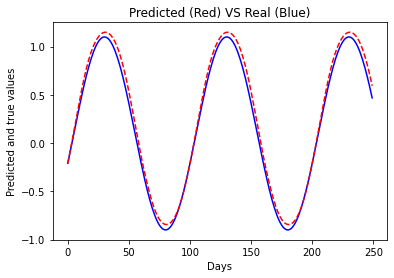

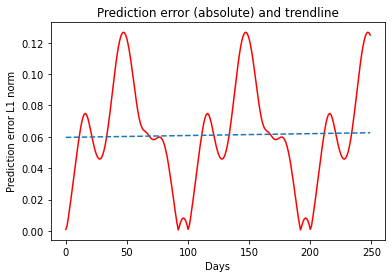

In [30]:
evaluate_ts(test_X,test_y,y_pr)

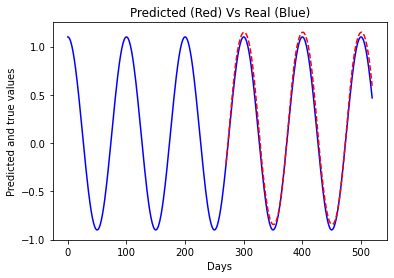

In [31]:
plt.plot(range(len(cos_values)),cos_values,'b')
plt.plot(range(len(cos_values)-test_size,len(cos_values)),y_pr,'r--')
plt.xlabel('Days')
plt.ylabel('Predicted and true values')
plt.title("Predicted (Red) Vs Real (Blue)")
plt.show()